In [1]:
#The Iris flower data set or Fisher's Iris data set is a 
#multivariate data set introduced by Sir Ronald Fisher in the 1936 
#as an example of discriminant analysis.
#The data set consists of 50 samples from each of three species of Iris 
#(Iris setosa, Iris virginica and Iris versicolor), 
#so 150 total samples. 
#Four features were measured from each sample: 
#the length and the width of the sepals and petals, in centimeters.

"""
The iris dataset contains measurements for 150 iris flowers 
from three different species.

The three classes in the Iris dataset:

Iris-setosa (n=50)
Iris-versicolor (n=50)
Iris-virginica (n=50)
The four features of the Iris dataset:

sepal length in cm
sepal width in cm
petal length in cm
petal width in cm

"""


'\nThe iris dataset contains measurements for 150 iris flowers \nfrom three different species.\n\nThe three classes in the Iris dataset:\n\nIris-setosa (n=50)\nIris-versicolor (n=50)\nIris-virginica (n=50)\nThe four features of the Iris dataset:\n\nsepal length in cm\nsepal width in cm\npetal length in cm\npetal width in cm\n\n'

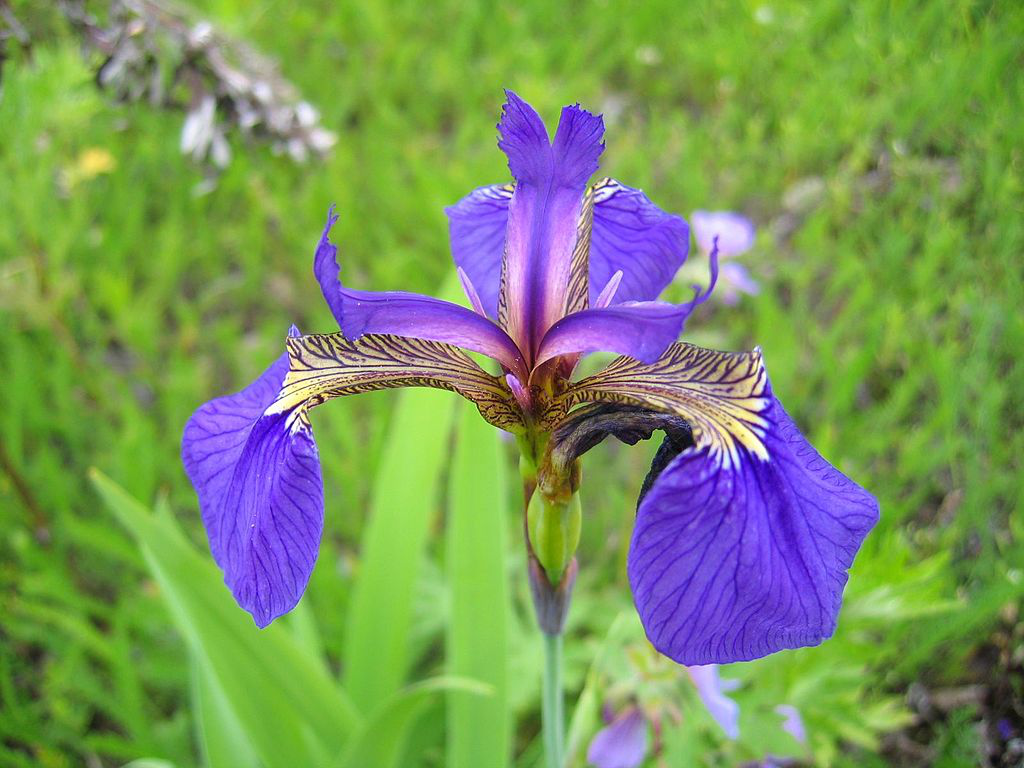

In [2]:
# importing pictures
# The Iris Setosa
from PIL import Image
Image.open('Irissetosa1.jpg')

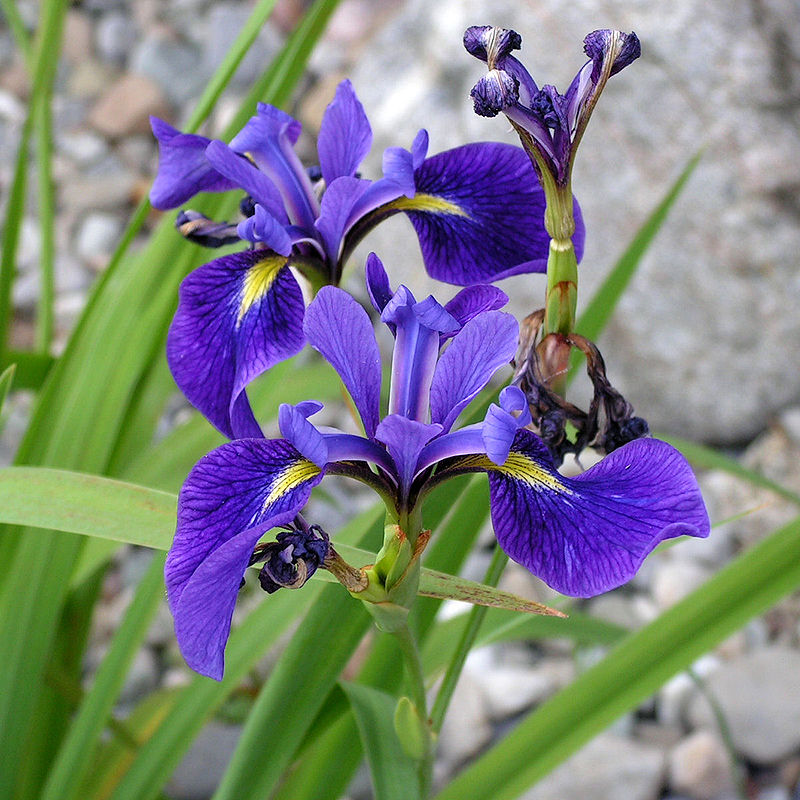

In [3]:
# The Iris Versicolor
Image.open('iris versicolor.jpg')

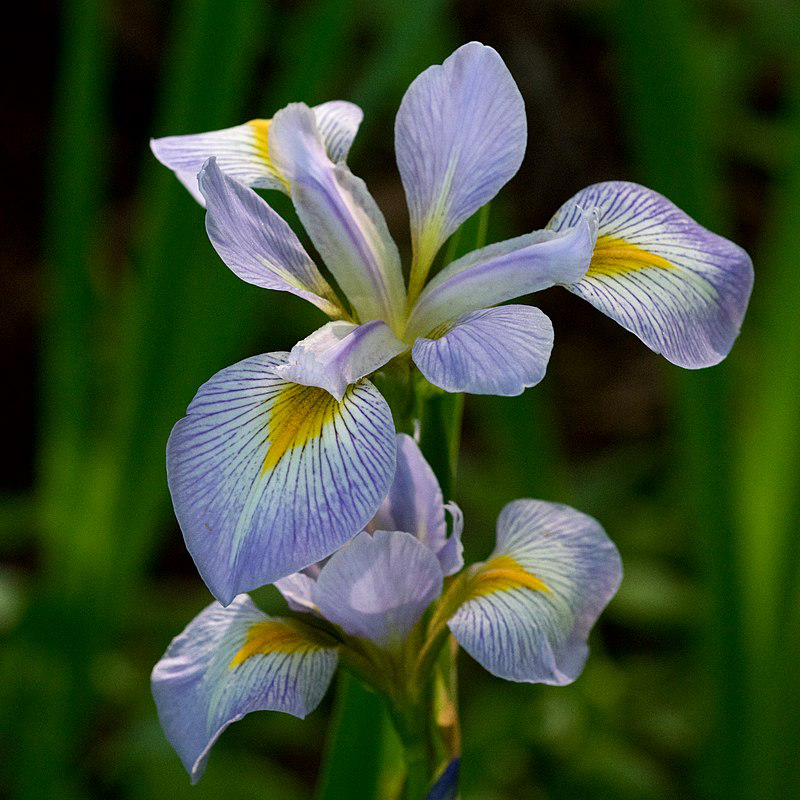

In [4]:
#The Iris Virginica
Image.open('iris verginica.jpg')

In [5]:
#1 importing the data

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

In [45]:
cf.go_offline()

In [7]:
iris = sns.load_dataset('iris')

In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [13]:
#2 exploratory data analysis

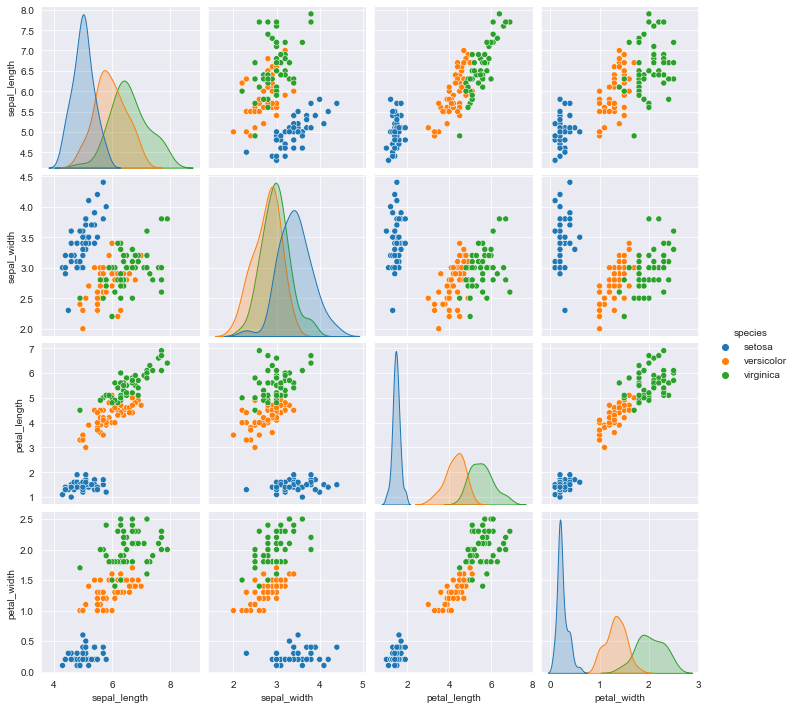

In [14]:
sns.set_style('darkgrid')
sns.pairplot(data=iris,hue='species')
#looks like the Setosa type is the most separable

(1.5, 5.0)

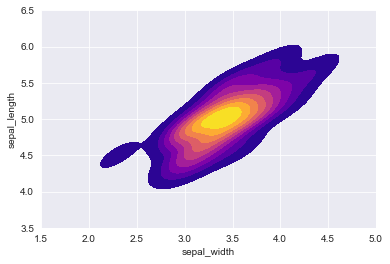

In [49]:
sns.kdeplot(x=iris['sepal_width'][iris['species']=='setosa'],y=iris['sepal_length'][iris['species']=='setosa'],
            data=iris,fill=True,cmap='plasma')
plt.ylim(3.5,6.5)
plt.xlim(1.5,5.0)

In [48]:
iris.iplot(kind='scatter',x='sepal_length',y='sepal_width',mode='markers',categories='species')

C:\Users\DZCH0CV\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\DZCH0CV\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [16]:
#4 splitting the data (train test split)

In [17]:
from sklearn.model_selection import train_test_split

In [50]:
X=iris.drop('species',axis=1)
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [51]:
X_test.head()

sepal_length  sepal_width  petal_length  petal_width
137           6.4          3.1           5.5          1.8
97            6.2          2.9           4.3          1.3
47            4.6          3.2           1.4          0.2
11            4.8          3.4           1.6          0.2
0             5.1          3.5           1.4          0.2

In [52]:
X_train.head()

sepal_length  sepal_width  petal_length  petal_width
93           5.0          2.3           3.3          1.0
8            4.4          2.9           1.4          0.2
98           5.1          2.5           3.0          1.1
49           5.0          3.3           1.4          0.2
65           6.7          3.1           4.4          1.4

In [53]:
y_test.value_counts()

versicolor    17
setosa        16
virginica     12
Name: species, dtype: int64

In [54]:
y_train.value_counts()

virginica     38
setosa        34
versicolor    33
Name: species, dtype: int64

In [55]:
#5 training the model

In [56]:
from sklearn.svm import SVC

In [57]:
model = SVC()

In [58]:
model.fit(X_train,y_train)

SVC()

In [59]:
pred = model.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix,classification_report

In [61]:
print(confusion_matrix(y_test,pred))

[[16  0  0]
 [ 0 16  1]
 [ 0  0 12]]


In [62]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        17
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [63]:
#6 gridsearch practice

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [66]:
grid = GridSearchCV(SVC(),param_grid,verbose=2)

In [67]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [68]:
grid.best_estimator_

SVC(C=1, gamma=1)

In [69]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [70]:
grid_pred = grid.predict(X_test)

In [71]:
print(confusion_matrix(y_test,grid_pred))

[[16  0  0]
 [ 0 16  1]
 [ 0  0 12]]


In [72]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        17
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

